In [2]:
#importing lybraries
import numpy as np

import scipy as sp
from scipy import optimize
from scipy import signal
from scipy.signal import argrelextrema

import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.unicode'] = True

import math as mt
import random

import glob
import time

In [3]:
#defining x-axis for test functions
x_axis= np.arange(-20.0,20.0,0.1)

#noise function
def noise():
    noi = np.random.normal(0,0.03,400)
    return noi

#test functions
#line with random fluctuations (type y = m*x + b)
def rand_line(xval, m, b = 0):
    lineRand = [None]*len(xval);
    for i in range(len(xval)):
        lineRand[i] = np.random.randn(1)*(m*xval[i] + b);
    return lineRand

#normal gaussian
def Gauss(x, a, x0, sigma, c = 0):
    return -a * np.exp(-((x - x0) / sigma)**2) + c


#gaussian with random fluctuations
def rand_gaus(xval, xval0, a, b, c ):
    gaussRand = [None]*len(xval);
    noi = np.asarray(noise());
    for i in range(len(xval)):
        gaussRand[i] = -(a * np.exp(-((xval[i]-xval0)/b)**2) + c) + noi[i]; #np.random.randn(1)* for noise
    return gaussRand

#doble gaussian with random fluctuations
def rand_dgaus(xval, xval01, a1, b1, c, xval02, a2, b2):
    gaussRand = [None]*len(xval);
    noi = np.asarray(noise());
    for i in range(len(xval)):
        gaussRand[i] = -(a1 * np.exp(-((xval[i]-xval01)/b1)**2) + a2 * np.exp(-((xval[i]-xval02)/b2)**2)  + c) + noi[i]; #np.random.randn(1)* for noise
    return gaussRand

#parabola with random fluctuations
def rand_parab(xval, a, b, c):
    paraRand = np.zeros(len(xval));
    for i in range(len(xval)):
        paraRand[i] =  (a*xval[i] **2 + b*xval[i] + c);
    return paraRand

#multiplot function for plot many lineshapes in a plot
def multiplot(list, title='Title'):
    plt.figure()
    for i in list:
        plt.plot(i)
        plt.title(title)
        plt.grid()
        
#function for discrete convolution of a list
def discv(datalst):
    cv = [None]*(len(datalst)-1);
    for i in range(len(datalst)-1):
        cv[i] = np.convolve(data_lst[i],data_lst[i+1]);
    return cv

#function for compute difference between functions in a list
def pos_dif(func, axis, flst):
    fg_lst = [];
    xvalues = axis;
    
    print(type(flst), np.shape(flst))
    print(type(axis), np.shape(axis))
    
    #loop for the different curves
    for i in range(len(flst)):
        yvalues =  np.asarray(flst[i]);

        #gaussian fitting
        #weighted arithmetic mean
        mean = sum(xvalues * yvalues) / sum(yvalues);
        sigma = np.sqrt(sum(yvalues * (xvalues - mean)**2) / sum(yvalues));   
        popt, pcov = sp.optimize.curve_fit(Gauss, xvalues, yvalues,p0=[(max(yvalues)-min(yvalues)), mean, sigma, max(yvalues)]);

        #minimum detecting
        fg = Gauss(xvalues,popt[0],popt[1],popt[2],popt[3]);
        y_min = np.asarray(np.where(fg == fg.min()));
        fg_lst.append(fg);
        
        #storage of list of mins
        min_lst.append(y_min);
    
    multiplot(flst)
    multiplot(fg_lst, 'Fit')
    
    min_dif = [];
    for i, j in zip(min_lst[:-1], min_lst[1:]):
        dif = np.abs(j-i)
        min_dif.append(dif);

    #averaging the differences
    ave = np.mean(min_dif)

    return (min_dif, ave, fg_lst) #returns the list of minima and the average of the difference

#function for transformation from linear displacement to angular displacement
def dist2ang(distlst,fdist,yPMdist,pdist,N):
    """
    Transform of linear distance differences into angle differences
    
    distlst: distance to be convert (x->theta)
    fdist: focal distance
    yPMdist: y-axis direction to Piezo Mirror distance
    pdist: distance to plane that contain distlst
    N: number of functions
    """
    ang_lst = np.arctan(np.asarray(distlst)*fdist*yPMdist/(pdist-fdist))
    
    #plot of calibration of x- and theta-displacement
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')

    plt.figure()
    plt.plot(np.reshape(distlst,N-1), marker='o')
    plt.title(r'Differences $\Delta X$')
    plt.xlabel(r'$\#$')
    plt.grid()
    plt.ylabel(r'$\Delta X$')

    plt.figure()
    plt.plot(np.reshape(ang_lst, N-1), marker='o')
    plt.title(r'$\theta(x)$')
    plt.xlabel('x')
    plt.ylabel(r'$\theta=tag^{-1}(x)$')
    plt.grid()
    plt.show()
    return ang_lst

In [4]:
# #testing functions
# fgaus=rand_gaus(x_axis,0,1,1,1)
# fline=rand_line(x_axis, 1,1)
# fparab=rand_parab(x_axis,1,0,0)
# plt.figure()
# plt.plot(x_axis, fline)

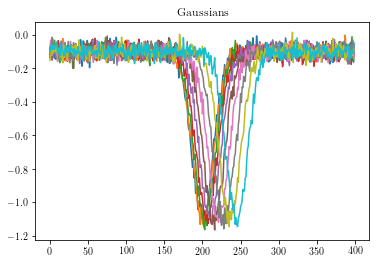

In [9]:
#setting N testing function
"""
data_lst: y-values of the test function
op: translation of gaussian
N: number of testing functions
"""
data_lst = [];
op = 0;
N = 10;

#for-loop for N functions (Gaussians)
for i in range(N): 
    op = op+(i*0.1); #translation parameter change in every loop with a value of +i
    data_lst.append(rand_gaus(x_axis, op, 1, 2, 0.1));
multiplot(data_lst, 'Gaussians')

#for-loop for N functions (doble Gaussians)
# for i in range(N):
#     op = op+i;
#     data_lst.append(rand_dgaus(x_axis, op, 1, 2, 0.1, op+5, 0.5, 2));
# multiplot(data_lst, 'Doble Gaussians')

In [10]:
# plt.figure()
# jj = np.array(data_lst[1])-np.array(data_lst[0])
# plt.plot(jj)
# plt.show()

# #computing convolutionof a list and plot
# conv_lst = discv(data_lst);
# multiplot(conv_lst)

(<type 'list'>, (10, 400))
(<type 'numpy.ndarray'>, (400,))


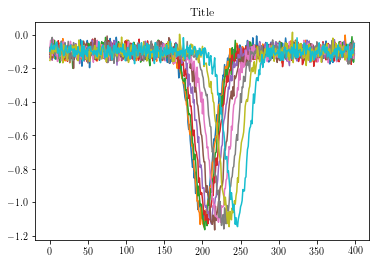

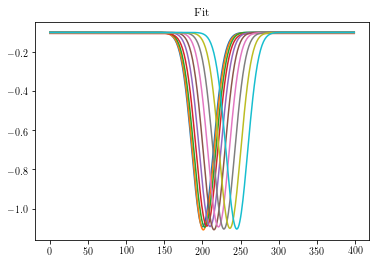

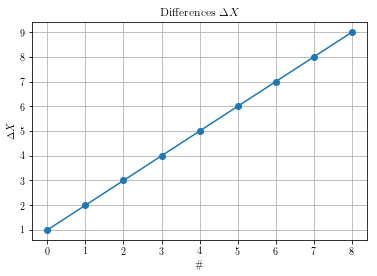

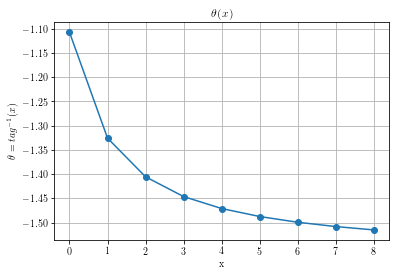

In [11]:
#computing difference between functions in data_lst
min_lst = []; # minima list
min_dif, average, fg_lst = pos_dif(Gauss, x_axis, data_lst); #difference

#computing transformation of difference to angular displacement difference
f_dist = 2.0; #mm
yPM_dist = 1.0; #mm
p_dist = 1.0; #mm
min_dif_ang = dist2ang(min_dif, f_dist, yPM_dist, p_dist,N);

In [8]:
klk=[1,2,7,0]
klk=klk+0.01
print(klk)

TypeError: can only concatenate list (not "float") to list

In [ ]:
# #plot of calibration of x- and theta-displacement
# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')

# plt.figure()
# plt.plot(np.reshape(min_dif,N-1), marker='o')
# plt.title(r'Differences $\Delta X$')
# plt.xlabel(r'$\#$')
# plt.grid()
# plt.ylabel(r'$\Delta X$')

# plt.figure()
# plt.plot(np.reshape(min_dif_ang, N-1), marker='o')
# plt.title(r'$\theta(x)$')
# plt.xlabel('x')
# plt.ylabel(r'$\theta=tag^{-1}(x)$')
# plt.grid()
# plt.show()

In [8]:

#doble gaussian
def dGauss(x, a1, x01, sigma1, a2, x02, sigma2, c = 0):
    return -(a1 * np.exp(-((x - x01) / sigma1)**2) + a2 * np.exp(-((x - x02) / sigma2)**2) + c)

def pos_difM(func, axis, flst):
    fg_lst = [];
    xvalues = axis;

    #loop for the different curves
    for i in range(len(flst)):
        yvalues =  np.asarray(flst[i]);

        #gaussian fitting
        #weighted arithmetic mean
        mean = sum(xvalues * yvalues) / sum(yvalues);
        sigma = np.sqrt(sum(yvalues * (xvalues - mean)**2) / sum(yvalues));   
        popt, pcov = sp.optimize.curve_fit(dGauss, xvalues, yvalues)#, p0=[(max(yvalues)-min(yvalues)), mean, sigma, max(yvalues)]);

        #minimum detecting
        fg = dGauss(xvalues,popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6]);
        y_min = np.asarray(np.where(fg == fg.min()));
        fg_lst.append(fg);
        
        #storage of list of mins
        min_lst.append(y_min);
    
    multiplot(fg_lst)
    
    min_dif = [];
    for i, j in zip(min_lst[:-1], min_lst[1:]):
        dif = np.abs(j-i)
        min_dif.append(dif);

    #averaging the differences
    ave = np.mean(min_dif)

    return (min_dif, ave, fg_lst) #returns the list of minima and the average of the difference

IndexError: list index out of range

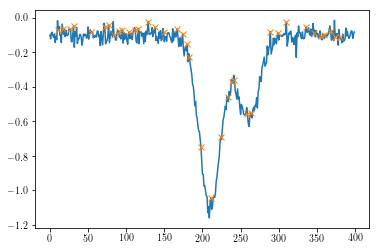

In [124]:
def pks(x,f_x):
    xvalues = np.asarray(x);
    yvalues = np.asarray(f_x);
    peakind = signal.find_peaks_cwt(yvalues, np.arange(1,1.01));
    
    plt.figure()
    plt.plot(yvalues)
    plt.plot(peakind,yvalues[peakind] ,"x")
    
def cvalues(x,f_x,noise=-0.25):
    xvalues = np.asarray(x);
    yvalues = np.asarray(f_x);
    
    #finding minima and maxima
    mini = argrelextrema(yvalues, np.greater,order=3);
    maxi = argrelextrema(yvalues, np.less,order=3);
    mini=list(mini);
    maxi=list(maxi);

    #computing the mean value
    mean = np.asarray(np.mean(yvalues))*np.ones(len(maxi[0]));
    mean=list(mean);
    
    #cleaning noise
    neg = np.copy(yvalues);
    neg[neg<noise] = 0.0;
    
    lt = list(mini[0]); 
    llt = len(lt);
    clt = lt
    for i in range(llt):
        j = lt[i],;
        if yvalues[j]>mean[0]:
#             print(i,j,yvalues[j],mean[0])
            del clt[i]
#             print(i,llt)
    
    #analysis of cases of the pais of gaussians
#     if a-b<noise:
#         dont something
#     if a-b<noise:
#         do something
        
    
    plt.figure()
    plt.plot(yvalues)
    plt.plot(yvalues-neg)
    plt.plot(mini[0], yvalues[mini], color='red', marker='x',linestyle='none')
    plt.plot(maxi[0], yvalues[maxi], color='gray', marker='*',linestyle='none')
    plt.plot(maxi[0], mean, color='black',linestyle='dashed')
    
    return mini
#example: 
pks(x_axis, data_lst[1])
mini = cvalues(x_axis, data_lst[1])
# print(mini)
# print(maxi)

In [ ]:
xvalues = np.asarray(x_axis);
yvalues = np.asarray(data_lst[1]);

mean1 = sum(xvalues * yvalues) / sum(yvalues);
sigma1 = np.sqrt(sum(yvalues * (xvalues - mean1)**2) / sum(yvalues)); 
mean2 = sum(xvalues * yvalues) / sum(yvalues);
sigma2 = np.sqrt(sum(yvalues * (xvalues - mean2)**2) / sum(yvalues)); 

am1=max(yvalues)-min(yvalues)
am2=(max(yvalues)-min(yvalues))
offset=max(yvalues)

popt, pcov = sp.optimize.curve_fit(dGauss, xvalues, yvalues, p0=[am1, mean1, sigma1, mean2, mean2, sigma2, offset]);

# funct=dGauss(xvalues,popt[0],popt[1],popt[2],popt[3],popt[4],popt[5],popt[6])

# plt.plot(yvalues)

# print(sp.version.full_version)
# sp.signal.find_peaks(yvalues, distance=150)

# plt.plot(funct)

# min_dif, average, fg_lst  = pos_difM(dGauss, x_axis, data_lst);